<a href="https://colab.research.google.com/github/jahidaoni/AAAAAAA/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

Load the Dataset

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d saurabhtayal/diabetic-patients-readmission-prediction
!unzip diabetic-patients-readmission-prediction.zip

# Load the data
data = pd.read_csv('diabetic_data.csv')

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/saurabhtayal/diabetic-patients-readmission-prediction
License(s): other
  0% 0.00/3.40M [00:00<?, ?B/s]
100% 3.40M/3.40M [00:00<00:00, 149MB/s]
Archive:  diabetic-patients-readmission-prediction.zip
  inflating: Data Dictonary.png      
  inflating: IDs_mapping.csv         
  inflating: diabetic_data.csv       


Inspect the Data

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

Handle Missing Values

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop columns with a large number of missing values or irrelevant columns
data = data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

# Drop rows with missing values
data = data.dropna()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Encode Categorical Variables

In [ ]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

Feature Scaling

In [ ]:
# Separate features and target variable
X = data.drop(['readmitted'], axis=1)
y = data['readmitted']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the Data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Linear Regression

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Evaluate
print("Linear Regression Accuracy:", accuracy_score(y_test, lr_pred.round()))

Linear Regression Accuracy: 0.45


Logistic Regression

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))

Logistic Regression Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.52      0.57      0.54        28
           2       0.50      0.58      0.54        24

    accuracy                           0.50        60
   macro avg       0.34      0.38      0.36        60
weighted avg       0.44      0.50      0.47        60



Naive Bayes

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.36666666666666664
              precision    recall  f1-score   support

           0       0.20      0.38      0.26         8
           1       0.00      0.00      0.00        28
           2       0.43      0.79      0.56        24

    accuracy                           0.37        60
   macro avg       0.21      0.39      0.27        60
weighted avg       0.20      0.37      0.26        60



Support Vector Machine (SVM)

In [ ]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      0.68      0.58        28
           2       0.50      0.46      0.48        24

    accuracy                           0.50        60
   macro avg       0.33      0.38      0.35        60
weighted avg       0.43      0.50      0.46        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Nearest Neighbors (KNN)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

KNN Accuracy: 0.43333333333333335
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.47      0.64      0.55        28
           2       0.42      0.33      0.37        24

    accuracy                           0.43        60
   macro avg       0.30      0.33      0.31        60
weighted avg       0.39      0.43      0.40        60



Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.6333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      0.86      0.71        28
           2       0.70      0.58      0.64        24

    accuracy                           0.63        60
   macro avg       0.43      0.48      0.45        60
weighted avg       0.56      0.63      0.58        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

# Evaluate
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.64      0.89      0.75        28
           2       0.75      0.62      0.68        24

    accuracy                           0.67        60
   macro avg       0.46      0.51      0.48        60
weighted avg       0.60      0.67      0.62        60



Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate
best_rf_pred = best_rf.predict(X_test)
print("Best Random Forest Accuracy:", accuracy_score(y_test, best_rf_pred))
print(classification_report(y_test, best_rf_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest Accuracy: 0.6166666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.57      0.96      0.72        28
           2       0.77      0.42      0.54        24

    accuracy                           0.62        60
   macro avg       0.45      0.46      0.42        60
weighted avg       0.58      0.62      0.55        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Evaluation and Comparison

In [ ]:
models = ['Linear Regression', 'Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, lr_pred.round()),
              accuracy_score(y_test, log_reg_pred),
              accuracy_score(y_test, nb_pred),
              accuracy_score(y_test, svm_pred),
              accuracy_score(y_test, knn_pred),
              accuracy_score(y_test, rf_pred),
              accuracy_score(y_test, gb_pred)]

for model, acc in zip(models, accuracies):
    print(f'{model} Accuracy: {acc}')

Linear Regression Accuracy: 0.45
Logistic Regression Accuracy: 0.5
Naive Bayes Accuracy: 0.36666666666666664
SVM Accuracy: 0.5
KNN Accuracy: 0.43333333333333335
Random Forest Accuracy: 0.6333333333333333
Gradient Boosting Accuracy: 0.6666666666666666


Confusion Matrix

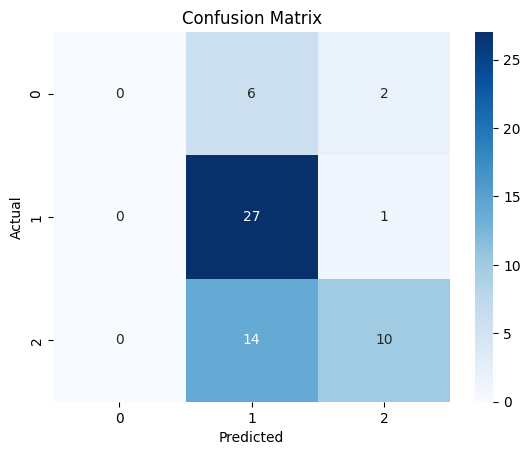

In [ ]:
# Confusion Matrix for the best model
best_model = best_rf  # Assuming Random Forest is the best model
best_pred = best_rf_pred

cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()